<a href="https://colab.research.google.com/github/ABIN-KC/ml-stroke-analysis/blob/main/stroke_model_comparison.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Dataset shape: (5110, 12)
Column names: ['id', 'gender', 'age', 'hypertension', 'heart_disease', 'ever_married', 'work_type', 'Residence_type', 'avg_glucose_level', 'bmi', 'smoking_status', 'stroke']
      id  gender   age  hypertension  heart_disease ever_married  \
0   9046    Male  67.0             0              1          Yes   
1  51676  Female  61.0             0              0          Yes   
2  31112    Male  80.0             0              1          Yes   
3  60182  Female  49.0             0              0          Yes   
4   1665  Female  79.0             1              0          Yes   

       work_type Residence_type  avg_glucose_level   bmi   smoking_status  \
0        Private          Urban             228.69  36.6  formerly smoked   
1  Self-employed          Rural             202.21   NaN     never smoked   
2        Private          Rural             105.92  32.5     never smoked   
3        Private          Urban             171.23  34.4           smokes   
4  Sel

/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))



Model Evaluation Results:
                  Model  Accuracy  Precision    Recall  F1 Score
0  Logistic Regression  0.957230   0.916290  0.957230  0.936313
1            SVM (RBF)  0.957230   0.916290  0.957230  0.936313
2          Naive Bayes  0.882892   0.934056  0.882892  0.905562
3        Decision Tree  0.914460   0.918182  0.914460  0.916313


/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


<Figure size 1000x600 with 0 Axes>

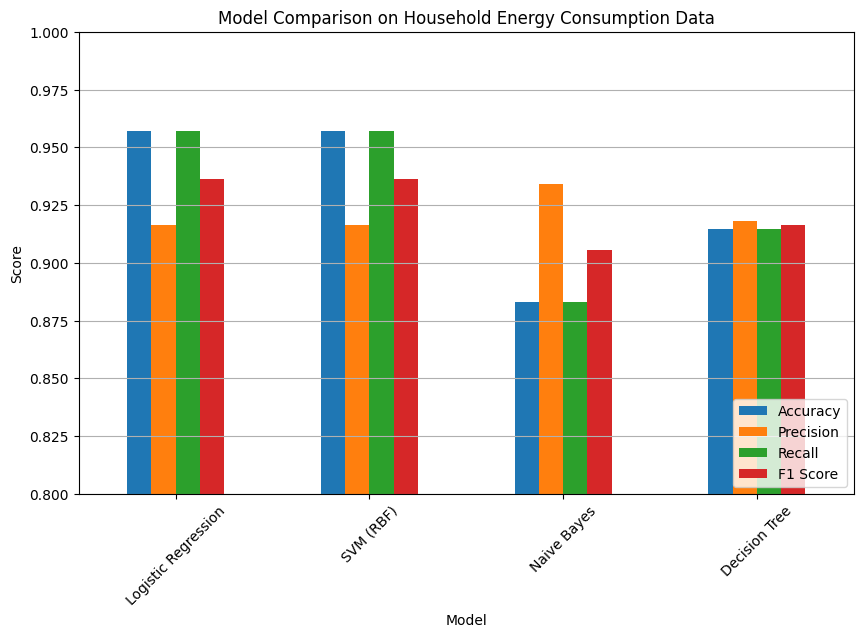

In [ ]:
#Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier

# Load dataset directly from GitHub
url = "https://raw.githubusercontent.com/ABIN-KC/ml-stroke-analysis/main/healthcare-dataset-stroke-data.csv"
df = pd.read_csv(url)

print("Dataset shape:", df.shape)
print("Column names:", df.columns.tolist())
print(df.head())

# Handle missing values
df = df.dropna()

# Automatically pick target column (last column assumed as consumption)
target_col = df.columns[-1]
print("Using target column:", target_col)

X = df.drop(columns=[target_col])
y = df[target_col]

# Drop Date/Time if present
for col in ["Date", "Time"]:
    if col in X.columns:
        X = X.drop(columns=[col])

# Encode categorical features in X
for col in X.columns:
    if X[col].dtype == 'object':  # if column is text
        le = LabelEncoder()
        X[col] = le.fit_transform(X[col])

# Convert target into numeric (if needed)
y = pd.to_numeric(y, errors='coerce')
y = y.dropna()
df = df.loc[y.index]

# If you want to keep binary classification (recommended for imbalanced datasets like stroke)
y_encoded = y.values  # use 0/1 directly

# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train/Test split
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y_encoded, test_size=0.2, random_state=42, stratify=y_encoded)

# Define models
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "SVM (RBF)": SVC(kernel='rbf'),
    "Naive Bayes": GaussianNB(),
    "Decision Tree": DecisionTreeClassifier(random_state=42)
}

# Train & evaluate
results = {"Model": [], "Accuracy": [], "Precision": [], "Recall": [], "F1 Score": []}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    results["Model"].append(name)
    results["Accuracy"].append(accuracy_score(y_test, y_pred))
    results["Precision"].append(precision_score(y_test, y_pred, average='weighted'))
    results["Recall"].append(recall_score(y_test, y_pred, average='weighted'))
    results["F1 Score"].append(f1_score(y_test, y_pred, average='weighted'))

results_df = pd.DataFrame(results)
print("\nModel Evaluation Results:\n", results_df)

# Plot results with zoomed-in scale
plt.figure(figsize=(10,6))
results_df.set_index("Model").plot(kind='bar', figsize=(10,6))
plt.title("Model Comparison on Household Energy Consumption Data")
plt.ylabel("Score")
plt.ylim(0.8, 1.0)
plt.xticks(rotation=45)
plt.legend(loc='lower right')
plt.grid(axis='y')
plt.show()
